## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [231]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [232]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [233]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [234]:
df.query('converted == "1"')['user_id'].nunique()/ df['user_id'].nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [235]:
## to remove
df.groupby(['landing_page','group'])['user_id'].count()

landing_page  group    
new_page      control        1928
              treatment    145311
old_page      control      145274
              treatment      1965
Name: user_id, dtype: int64

In [236]:
df.query('landing_page == "new_page" and group == "control" or \
landing_page == "old_page" and group == "treatment" ').shape[0]

3893

f. Do any of the rows have missing values?

In [237]:
df.info()
# no rows have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [238]:
df_1= df.query('landing_page == "new_page" and group == "treatment"')
df_2= df.query('landing_page == "old_page" and group == "control"')
frames = [df_1,df_2]
df2 = pd.concat(frames)
df2.groupby(['landing_page','group'])['user_id'].count()

landing_page  group    
new_page      treatment    145311
old_page      control      145274
Name: user_id, dtype: int64

In [239]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [240]:
df2[(df2['group'] == 'treatment')]

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [241]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [242]:
df2.groupby('user_id')['user_id'].count().nlargest(1).reset_index(name = 'count')

,user_id,count
0,773192,2


c. What is the row information for the repeat **user_id**? 

In [243]:
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


 d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [244]:
df2 = df2.drop_duplicates(subset = ['user_id'], keep = 'last')
df2.query('user_id == "773192"')


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [245]:
df2.query('converted == "1"')['user_id'].count()/df2['user_id'].count()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [246]:
df2.query('converted == "1" and group == "control"')['user_id'].count()\
/df2.query('group == "control"')['user_id'].count()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [247]:
df2.query('converted == "1" and group == "treatment"')['user_id'].count()\
/df2.query('group == "treatment"')['user_id'].count()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [248]:
df2.query('landing_page == "new_page"')['user_id'].count()\
/df2['user_id'].count()

0.5000619442226688

In [249]:
df2.query('group == "treatment"')['landing_page'].unique()

array(['new_page'], dtype=object)

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Probability of converting regardless of any group is 0.1196, but if an user is in control group, this probabilty of conversion goes up to 0.1204, whereas for treatment group, this probability goes down to 0.1189. Thus there is a significance evidence to say that new treatment page is no better than old control page.



<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{old} - p_{new} >= 0 $$
$$H_1: p_{old} - p_{new} < 0 $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [250]:
p_new = df2.query('converted == "1"').shape[0] /df2.shape[0]
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [251]:
p_old = df2.query('converted == "1"').shape[0] /df2.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$?

In [252]:
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [253]:
n_old= df2.query('landing_page == "old_page"').shape[0]
n_old

145274

In [254]:
sample_size = df2.query('converted == "1"').shape[0]
sample_size

34753

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [255]:
new_page_converted = np.random.choice([0,1], size = n_new, p= [(1-p_new),p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [256]:
old_page_converted = np.random.choice([0,1], size = n_old, p= [(1-p_old),p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [257]:
obs_diff =new_page_converted.mean() - old_page_converted.mean() 
obs_diff

0.0010371769682055026

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [258]:
p_diffs = []
for i in range(10000):
    new_page_converted= np.random.choice([0,1], size = n_new, p= [(1-p_new),p_new])
    old_page_converted = np.random.choice([0,1], size = n_old, p= [(1-p_old),p_old])
    p_diffs.append(new_page_converted.mean()- old_page_converted.mean()) 

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

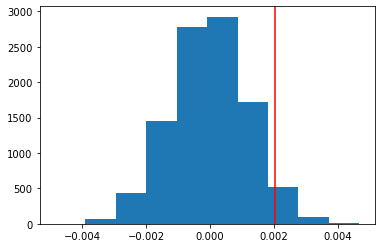

In [259]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)
plt.axvline(obs_diffs , color = 'red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [260]:
(p_diffs > obs_diff).mean()

0.1936

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

At 5% type- 1 error rate,the probability of getting an extreme values in the favor of null hypothesis is high.Thus we fail to reject the null hypothesis. This means old page is better performing than new page

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [261]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == "1"').shape[0]
convert_new = df2.query('landing_page == "new_page" and converted == "1"').shape[0]
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]
convert_old,convert_new,n_old,n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [262]:
z_test , p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_test , p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

By looking at the p-value which is significantly higher than type-1 error rate, we fail to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [263]:
df2['intercept'] = 1
#df2[['new_page', 'old_page']]= pd.get_dummies(df['landing_page'])
df2['ab_page']= pd.get_dummies(df['group'])['treatment']
df2

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0,1,0,1,0
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0,1,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0,1,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [264]:
log = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = log.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 17 Mar 2021   Pseudo R-squ.:               8.077e-06
Time:                        12:16:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

For logistic regression part, Hypotheses are:
$$ H_O: p_{new} - p_{old} = 0 $$
$$ H_1: p_{new} - p_{old} \neq0$$

Since the p-value of ab_page is more than type 1 error rate of 5%, we fail to reject the null hypothesis.Meaning treatment/control groups have no significant impact on conversion 

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

p-value associated with ab_page is 0.190 while the p-value in part 2 was 0.09. Regression model has 2 tail test while according to hypothesis in part 2 we have single tail test.Therefore we have got different p-values

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

We can add time of the day to see if it has some relationship to conversion

In [267]:
df2.date = pd.to_datetime(df2.timestamp)

<ipython-input-267-f940a22a356f>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df2.date = pd.to_datetime(df2.timestamp)


In [360]:
# binning the time in different bins to see if it impacts the conversion
bins = [0,6,12,18,24]
labels = ['00:00-05:59', '06:00-11:59', '12:00-17:59', '18:00-23:59']
df2['time_bin'] = pd.cut(df2.date.dt.hour, bins ,labels = labels, right = False)



In [276]:
# creating dummies for time_bin

df2[['00:00-05:59','06:00-11:59','12:00-17:59','18:00-23:59']]= pd.get_dummies(df2.time_bin)
df2.drop(['new_page','old_page'],axis = 1)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,time_bin,00:00-05:59,06:00-11:59,12:00-17:59,18:00-23:59
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,12:00-17:59,0,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,18:00-23:59,0,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,00:00-05:59,1,0,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,12:00-17:59,0,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,18:00-23:59,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0,1,0,18:00-23:59,0,0,0,1
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0,18:00-23:59,0,0,0,1
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0,00:00-05:59,1,0,0,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0,06:00-11:59,0,1,0,0


In [310]:
# logistic regression with taking variables of time of the day

log = sm.Logit(df2['converted'],df2[['intercept','00:00-05:59','06:00-11:59','12:00-17:59']])
results = log.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366103
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 17 Mar 2021   Pseudo R-squ.:               4.990e-05
Time:                        15:12:22   Log-Likelihood:            -1.0638e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.01398
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -1.9819      0.011   -174.282      0.000      -2.004      -1.960
00:00-05:59    -0.0467      0.016     -2.879      0.004      -0.079      -0.015
06:00-11:59    -0.0060      0.016     -0.374      0.709      -0.038       0.026
12:00-17:59    -0.0054      0.016     -0.336      0.737      -0.037       0.026
===============================================================================
"""

As we can see above one of time bin is statiscally significant with p-value less than 5% ,in determining the conversion.

ab_page is not a good indicator of response variable.We can explore on more explanatory variables like time, location, gender etc that might defines the response variables.

However, we need to be careful while pulling more response variables as there might be instances of collinearity that might lead to distorted results. To account for this we should use pairplots to see the kind of relationship between independent variables. Also use VIF(variance inflation factors)to remove least important factors.

Another important thing to keep in mind is that we might need to account for higher order terms because of difference of slopes of x variables(they not being parallel). For this we should add interaction by multiplying these 2 variables.

In [314]:
df2['hour']= df2.date.dt.hour
df2

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,time_bin,00:00-05:59,06:00-11:59,12:00-17:59,18:00-23:59,hour
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,12:00-17:59,0,0,1,0,16
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,18:00-23:59,0,0,0,1,18
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,0,1,00:00-05:59,1,0,0,0,3
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,0,1,12:00-17:59,0,0,1,0,17
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,0,1,18:00-23:59,0,0,0,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0,1,0,1,0,18:00-23:59,0,0,0,1,22
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0,1,0,18:00-23:59,0,0,0,1,22
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0,1,0,00:00-05:59,1,0,0,0,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0,1,0,06:00-11:59,0,1,0,0,11


In [315]:
log = sm.Logit(df2['converted'],df2[['intercept','hour']])
results = log.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 17 Mar 2021   Pseudo R-squ.:               3.351e-05
Time:                        15:29:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                  0.007582
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0217      0.011   -181.312      0.000      -2.044      -2.000
hour           0.0022      0.001      2.670      0.008       0.001       0.004
==============================================================================
"""

In [316]:
np.exp(0.0022)

1.0022024217756431

In [359]:
log = sm.Logit(df2['converted'],df2[['intercept','hour','ab_page']])
results = log.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366106
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 17 Mar 2021   Pseudo R-squ.:               4.156e-05
Time:                        16:31:18   Log-Likelihood:            -1.0638e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.01201
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0143      0.013   -160.898      0.000      -2.039      -1.990
hour           0.0022      0.001      2.669      0.008       0.001       0.004
ab_page       -0.0150      0.011     -1.309      0.190      -0.037       0.007
==============================================================================
"""

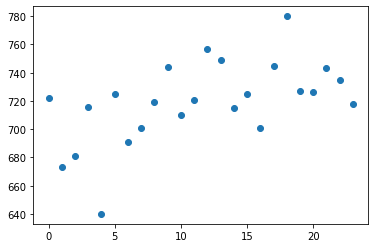

In [354]:
tm_conv= df2.query('group == "treatment" and converted == "1"').groupby(['hour'])['converted'].count().\
reset_index(name = 'count')
plt.scatter(tm_conv['hour'], tm_conv['count'])

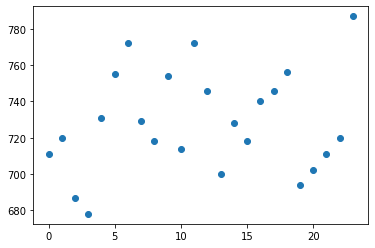

In [357]:
ct_conv= df2.query('group == "control" and converted == "1"').groupby(['hour'])['converted'].count().\
reset_index(name = 'count')
plt.scatter(ct_conv['hour'], ct_conv['count'])

In [358]:
ct_conv['intercept'] = 1
lin= sm.OLS(ct_conv['count'], ct_conv[['intercept','hour']])
results= lin.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.7709
Date:                Wed, 17 Mar 2021   Prob (F-statistic):              0.389
Time:                        16:27:54   Log-Likelihood:                -113.24
No. Observations:                  24   AIC:                             230.5
Df Residuals:                      22   BIC:                             232.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    720.2833     11.200     64.313      0.000     697.057     743.510
hour           0.7326      0.834      0.878      0.389      -0.998       2.463
==============================================================================
Omnibus:                        1.328   Durbin-Watson:                   1.471
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                0.985
Skew:                           0.209   Prob(JB):                        0.611
Kurtosis:                       2.100   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [374]:
hour_dummies=  pd.get_dummies(df2['hour'])
df2_new = df2.join(hour_dummies)


ValueError: columns overlap but no suffix specified: Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='object')

In [376]:
df3 = df2

In [377]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 2 to 294476
Data columns (total 39 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   user_id       290584 non-null  int64   
 1   timestamp     290584 non-null  object  
 2   group         290584 non-null  object  
 3   landing_page  290584 non-null  object  
 4   converted     290584 non-null  int64   
 5   intercept     290584 non-null  int64   
 6   new_page      290584 non-null  uint8   
 7   old_page      290584 non-null  uint8   
 8   ab_page       290584 non-null  uint8   
 9   time_bin      290584 non-null  category
 10  00:00-05:59   290584 non-null  uint8   
 11  06:00-11:59   290584 non-null  uint8   
 12  12:00-17:59   290584 non-null  uint8   
 13  18:00-23:59   290584 non-null  uint8   
 14  hour          290584 non-null  int64   
 15  0             290584 non-null  uint8   
 16  1             290584 non-null  uint8   
 17  2             290584 non-null

In [373]:
log = sm.Logit(df2['converted'],df2[['intercept','ab_page','0']])
results = log.fit()
results.summary()

KeyError: "['0'] not in index"

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [284]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [291]:
### Create the necessary dummy variables
df_new[['CA','UK','US']]= pd.get_dummies(df_new['country'])
df_new = df_new.drop('US', axis = 1)
df_new

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,time_bin,00:00-05:59,06:00-11:59,12:00-17:59,18:00-23:59,CA,UK
user_id,,,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,18:00-23:59,0,0,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,12:00-17:59,0,0,1,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,12:00-17:59,0,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,00:00-05:59,1,0,0,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,12:00-17:59,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,0,1,0,00:00-05:59,1,0,0,0,0,0
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,0,1,0,12:00-17:59,0,0,1,0,0,1
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,0,1,0,18:00-23:59,0,0,0,1,0,1


In [296]:
log = sm.Logit(df_new['converted'],df_new[['intercept','CA','UK']])
results =log.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 17 Mar 2021   Pseudo R-squ.:               1.521e-05
Time:                        14:36:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

Since p-values for CA, UK are more than 5% type 1 error rate, we fail to reject the null hypothesis.Thus we stick to the fact that old page is better than new page.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [306]:
### Fit Your Linear Model And Obtain the Results

log = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','CA','UK']])
results =log.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 17 Mar 2021   Pseudo R-squ.:               2.323e-05
Time:                        15:03:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [305]:
np.exp(-.0408) , 1/np.exp(-.0408), np.exp(0.0099),1/np.exp(0.0099)

(0.9600211149716509,
 1.0416437559600236,
 1.0099491671175422,
 0.9901488436829571)

Above results shows that p-values of countries and page are individually more than 5%, thus we fail to reject the null hypothesis.Also for 1 unit change in CA, converted units are decreased by 0.96 units and for UK it is increased by 1.0099

In [300]:
df_new['CA_ab_page']= df_new['ab_page']*df_new['CA']
df_new['UK_ab_page']= df_new['ab_page']*df_new['UK']

In [301]:
# caputuring the interaction between pages and countries
log = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','CA','UK','CA_ab_page','UK_ab_page']])
results =log.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 17 Mar 2021   Pseudo R-squ.:               3.482e-05
Time:                        14:58:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

Since all the p-values are more than 5% we again fail to reject null hypthesis. The interaction between types of pages and countries also doesn't show any impact.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

In [379]:
df2['date']= pd.to_datetime(df2['timestamp'])


In [384]:
df2['date'].dt.date.max() , df2['date'].dt.date.min()

(datetime.date(2017, 1, 24), datetime.date(2017, 1, 2))

In [395]:
df2['datedata']= df2['date'].dt.date
df2['day']= df2['date'].dt.day
df2

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,time_bin,...,17,18,19,20,21,22,23,date,datedata,day
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,12:00-17:59,...,0,0,0,0,0,0,0,2017-01-11 16:55:06.154213,2017-01-11,11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,18:00-23:59,...,0,1,0,0,0,0,0,2017-01-08 18:28:03.143765,2017-01-08,8
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,0,1,00:00-05:59,...,0,0,0,0,0,0,0,2017-01-19 03:26:46.940749,2017-01-19,19
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,0,1,12:00-17:59,...,1,0,0,0,0,0,0,2017-01-04 17:58:08.979471,2017-01-04,4
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,0,1,18:00-23:59,...,0,1,0,0,0,0,0,2017-01-15 18:11:06.610965,2017-01-15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0,1,0,1,0,18:00-23:59,...,0,0,0,0,0,1,0,2017-01-21 22:44:20.378320,2017-01-21,21
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0,1,0,18:00-23:59,...,0,0,0,0,0,1,0,2017-01-03 22:28:38.630509,2017-01-03,3
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0,1,0,00:00-05:59,...,0,0,0,0,0,0,0,2017-01-12 00:51:57.078372,2017-01-12,12
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0,1,0,06:00-11:59,...,0,0,0,0,0,0,0,2017-01-22 11:45:03.439544,2017-01-22,22


In [400]:
df2['week_number'] = df2['date'].dt.week
df2

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,time_bin,...,18,19,20,21,22,23,date,datedata,day,week_number
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,12:00-17:59,...,0,0,0,0,0,0,2017-01-11 16:55:06.154213,2017-01-11,11,2
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,18:00-23:59,...,1,0,0,0,0,0,2017-01-08 18:28:03.143765,2017-01-08,8,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,0,1,00:00-05:59,...,0,0,0,0,0,0,2017-01-19 03:26:46.940749,2017-01-19,19,3
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,0,1,12:00-17:59,...,0,0,0,0,0,0,2017-01-04 17:58:08.979471,2017-01-04,4,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,0,1,18:00-23:59,...,1,0,0,0,0,0,2017-01-15 18:11:06.610965,2017-01-15,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0,1,0,1,0,18:00-23:59,...,0,0,0,0,1,0,2017-01-21 22:44:20.378320,2017-01-21,21,3
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0,1,0,18:00-23:59,...,0,0,0,0,1,0,2017-01-03 22:28:38.630509,2017-01-03,3,1
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0,1,0,00:00-05:59,...,0,0,0,0,0,0,2017-01-12 00:51:57.078372,2017-01-12,12,2
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0,1,0,06:00-11:59,...,0,0,0,0,0,0,2017-01-22 11:45:03.439544,2017-01-22,22,3


In [408]:
df2.query('week_number == "1"')

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,time_bin,...,18,19,20,21,22,23,date,datedata,day,week_number
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,18:00-23:59,...,1,0,0,0,0,0,2017-01-08 18:28:03.143765,2017-01-08,8,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,0,1,12:00-17:59,...,0,0,0,0,0,0,2017-01-04 17:58:08.979471,2017-01-04,4,1
17,888545,2017-01-08 06:37:26.332945,treatment,new_page,1,1,1,0,1,06:00-11:59,...,0,0,0,0,0,0,2017-01-08 06:37:26.332945,2017-01-08,8,1
26,892356,2017-01-05 09:35:14.904865,treatment,new_page,1,1,1,0,1,06:00-11:59,...,0,0,0,0,0,0,2017-01-05 09:35:14.904865,2017-01-05,5,1
29,736159,2017-01-06 01:50:21.318242,treatment,new_page,0,1,1,0,1,00:00-05:59,...,0,0,0,0,0,0,2017-01-06 01:50:21.318242,2017-01-06,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294406,875719,2017-01-08 01:06:07.868496,control,old_page,0,1,0,1,0,00:00-05:59,...,0,0,0,0,0,0,2017-01-08 01:06:07.868496,2017-01-08,8,1
294409,659902,2017-01-04 00:12:23.354149,control,old_page,0,1,0,1,0,00:00-05:59,...,0,0,0,0,0,0,2017-01-04 00:12:23.354149,2017-01-04,4,1
294418,746102,2017-01-02 18:16:08.030638,control,old_page,0,1,0,1,0,18:00-23:59,...,1,0,0,0,0,0,2017-01-02 18:16:08.030638,2017-01-02,2,1
294467,857744,2017-01-05 08:00:56.024226,control,old_page,0,1,0,1,0,06:00-11:59,...,0,0,0,0,0,0,2017-01-05 08:00:56.024226,2017-01-05,5,1


In [402]:
df2.query('converted == "1"').groupby(['week_number','group'])['converted'].sum()

week_number  group    
1            control      5059
             treatment    5016
2            control      5540
             treatment    5461
3            control      5603
             treatment    5536
4            control      1287
             treatment    1251
Name: converted, dtype: int64

In [403]:
df2.query('converted == "1"').groupby(['week_number','group'])['converted'].count()

week_number  group    
1            control      5059
             treatment    5016
2            control      5540
             treatment    5461
3            control      5603
             treatment    5536
4            control      1287
             treatment    1251
Name: converted, dtype: int64

In [412]:
df2.groupby(['week_number','group'])['user_id'].count()

week_number  group    
1            control      42351
             treatment    42573
2            control      46306
             treatment    46277
3            control      46147
             treatment    46146
4            control      10470
             treatment    10314
Name: user_id, dtype: int64